In [26]:
import mdtraj as mdj
import numpy as np
import matplotlib.pyplot as plt


In [2]:
cry_pdb = mdj.load_pdb('inputs/complex_prod.pdb')
namd_pdb = mdj.load_pdb('inputs/complex_namd.pdb')
eq_pdb = mdj.load_pdb('inputs/eq.pdb')


/home/ndonyapour/miniconda3/envs/bfee2/lib/python3.8/site-packages/mdtraj/formats/pdb/pdbfile.py:200: UserWarning: Unlikely unit cell vectors detected in PDB file likely resulting from a dummy CRYST1 record. Discarding unit cell vectors.
  warnings.warn('Unlikely unit cell vectors detected in PDB file likely '


In [6]:
protein_idxs = cry_pdb.top.select("protein and type!='H'")
ligand_idxs = cry_pdb.top.select("resname MOL")

In [11]:
print(mdj.rmsd(cry_pdb, namd_pdb, atom_indices=protein_idxs) * 10)
print(mdj.rmsd(cry_pdb, eq_pdb, atom_indices=protein_idxs) * 10)

[1.0190296]
[1.996774]


In [10]:
print(mdj.rmsd(cry_pdb, namd_pdb, atom_indices=ligand_idxs) * 10)
print(mdj.rmsd(cry_pdb, eq_pdb, atom_indices=ligand_idxs) * 10)

[1.1814983]
[1.4095411]


In [18]:
print(cry_pdb.unitcell_vectors)
print(namd_pdb.unitcell_vectors)
print(namd_pdb.unitcell_vectors)


[[[7.9818 0.     0.    ]
  [0.     8.0034 0.    ]
  [0.     0.     7.9987]]]
None
None


In [22]:
cry_pdb.center_coordinates()
cry_pdb.save_pdb("inputs/complex_prod_centered.pdb")

In [24]:
cry_pdb = mdj.load_pdb('inputs/complex_prod.pdb')
cry_pdb_centered = mdj.load_pdb('inputs/complex_prod_centered.pdb')

In [25]:
print(mdj.rmsd(cry_pdb, cry_pdb_centered, atom_indices=ligand_idxs) * 10)

[0.]


In [41]:
energy_data = np.load('inputs/pe_eq.npy')
energy_data.shape

(1000, 5)

[-5.58543460e+05 -3.33424066e+05 -5.44217673e+05 -4.89034045e+05
  2.20031317e+09 -5.09666711e+05  7.67827715e+08 -4.68662420e+05
  7.86436810e+07  3.73301918e+04]
30441579.5215968


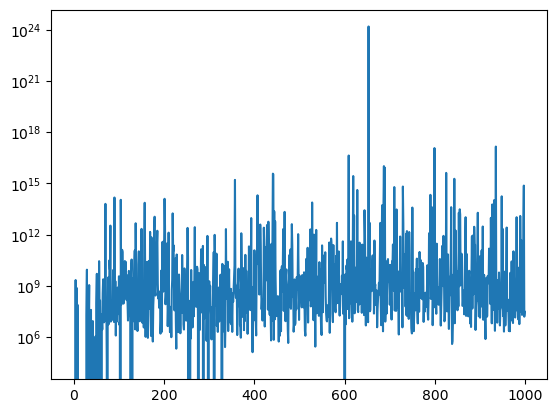

In [43]:
plt.plot(np.arange(energy_data.shape[0]),energy_data[:, -1])
print(energy_data[:10, -1])
plt.yscale('log')
# plt.ylim('')
print(energy_data[-1, -1])